# Make new compositional diagrams

In [1]:
import numpy as np
import dill as pickle
import matplotlib.pyplot as plt

In [2]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 1] - x[4][0][:, 2])**2) < 1e-8:
        if (x[4][1][1] > x[4][1][2]) and (x[4][1][1] > 1e-10):
            index_get.append(2)
        elif (x[4][1][2] > 1e-10):
            index_get.append(2)
    else:
        if x[4][1][1] > 1e-10:
            index_get.append(1)
        if x[4][1][2] > 1e-10:
            index_get.append(2)
    for ii in [0, 3, 4]:
        if x[4][1][ii] > 1e-10:
            index_get.append(ii)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'gray'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        else:
            color = 'burgundy'
    return index_get, color
def sr2xy(c1, c2=None):
    if type(c1) == np.ndarray:
        x = c1[:, 0] + 0.5 * c1[:, 1]
        y = c1[:, 1] * (np.sqrt(3.0) / 2.0)
        return np.transpose(np.vstack([x, y]))
    else:
        x = c1 + 0.5 * c2
        y = c2 * (np.sqrt(3.0) / 2.0)
        return x, y
def xy2sr(x, y=None):
    if type(x) == np.ndarray:
        c2 = x[:, 1] * (2.0 / np.sqrt(3.0))
        c1 = x[:, 0] - 0.5 * c2
        c3 = 1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3]))
    else:
        c2 = y * (2.0 / np.sqrt(3.0))
        c1 = x - 0.5 * c2
        c3 = 1 - c2 - c1
        return c1, c2, c3
def ctoxyz(c1, c2=None, c3=None):
    if type(c1) == np.ndarray:
        x = 0.5 * (c1[:, 0] + c1[:, 2]) + c1[:, 1]
        y = c1[:, 0] * (np.sqrt(3.0) / 2.0) + c1[:, 2] * (1 / (2.0 * np.sqrt(3.0)))
        z = c1[:, 0] * np.sqrt(2.0 / 3.0)
        return np.transpose(np.vstack([x, y, z]))
    else:
        x = 0.5 * (c1 + c3) + c2
        y = c1 * (np.sqrt(3.0) / 2.0) + c3 * (1 / (2.0 * np.sqrt(3.0)))
        z = c3 * np.sqrt(2.0 / 3.0)
        return x, y, z
def xyztoc(x, y=None, z=None):
    if type(x) == np.ndarray:
        c3 = x[:, 2] * np.sqrt(3.0 / 2.0)
        c1 = (x[:, 1] - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x[:, 0] - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3, c4]))
    else:
        c3 = z * np.sqrt(3.0 / 2.0)
        c1 = (y - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return c1, c2, c3, c4

color_dict = {0: 'blue',
              1: 'red',
              2: 'purple',
              3: 'black',
              4: 'orange'}

In [3]:
data = pickle.load(open('flashtable_165.0bar289.0K.pkl', 'rb'))

In [4]:
data

[[0,
  array([ 0.7       ,  0.03333333,  0.26666667,  0.        ]),
  ('water', 'methane', 'ethane'),
  array([ 0.7       ,  0.03333333,  0.26666667]),
  [array([[  9.98683870e-01,   1.38551471e-04,   1.38551471e-04,
             8.65600555e-01,   8.87122187e-01],
          [  2.74149570e-04,   6.35122593e-02,   6.35122593e-02,
             2.61924929e-02,   6.06221526e-02],
          [  1.04197997e-03,   9.36349189e-01,   9.36349189e-01,
             1.08206952e-01,   5.22556608e-02]]),
   array([  0.00000000e+00,   1.00000000e-10,   1.91343585e-01,
            8.08656415e-01,   0.00000000e+00]),
   array([[  6.84862592e+03,   1.00000000e+00,   1.00000000e+00,
             6.24750309e+03,   5.64636562e+03],
          [  4.10125275e-03,   1.00000000e+00,   1.00000000e+00,
             4.12400586e-01,   9.54495294e-01],
          [  1.05732375e-03,   1.00000000e+00,   1.00000000e+00,
             1.15562606e-01,   5.58078774e-02]]),
   13,
   6.8566169797666449e-07]],
 [1,
  array([ 0.7

In [5]:
def make_ref_list(data):
    phase_stable_lookup = dict()
    type_ref_list = list()
    phase_type = 0
    for ii, x in enumerate(data):
        index_get, color = get_stable_phases(x)
        if sorted(index_get) in type_ref_list:
            phase_stable_lookup[type_ref_list.index(sorted(index_get))]['inds'].append(ii)
        else:
            phase_stable_lookup[phase_type] = {'phases': sorted(index_get), 'inds': [ii], 'color': color}
            phase_type += 1
            type_ref_list.append(sorted(index_get))
    return type_ref_list, phase_stable_lookup
type_ref_list, phase_stable_lookup = make_ref_list(data)

In [6]:
def plot_tern_lines(x, tern_inds=[0,1,2]):
    z = x[4][0]
    absent_ind = [ind for ind in range(4) if ind not in tern_inds].pop()
    if (np.sum(x[1][tern_inds]) == 1) or (x[1][absent_ind] == 0.0):
        index_get, color = get_stable_phases(x)
        if x[-1][-1] < 5e-5:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')

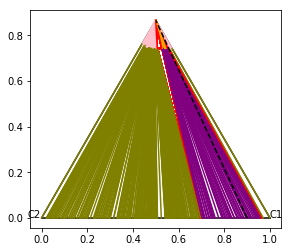

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
c1c2_inds = [0, 1, 2]
c1c3_inds = [0, 1, 3]
c2c3_inds = [0, 2, 3]
tern_inds = c1c2_inds
for x in data:
    plot_tern_lines(x, tern_inds=tern_inds)
x_mix1, y_mix1 = sr2xy(0.9, 0)
x_mix2, y_mix2 = sr2xy(0, 1)
plt.plot([x_mix1, x_mix2], [y_mix1, y_mix2], 'k--')
# x, y = sr2xy(0, 0.999)
# plt.plot(x, y, 'b.', markersize=10)
# x, y = sr2xy(0, 0.998)
# plt.plot(x, y, 'b.', markersize=10)
# x, y = sr2xy(0, 0.997)
# plt.plot(x, y, 'b.', markersize=10)
# plt.plot(x, y, 'b.', markersize=10)
# x, y = sr2xy(0, 0.98)
# plt.plot(x, y, 'g.', markersize=10)
# x, y = sr2xy(0, 0.95)
# plt.plot(x, y, 'r.', markersize=10)
# x, y = sr2xy(0, 0.9)
# plt.plot(x, y, 'r.', markersize=10)


plt.axis('scaled')
plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
plt.text(1.0, 0, 'C' + str(tern_inds[1]))



# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([0.864, 0.8665])
# plt.xlim([0.498, 0.502])

# plt.ylim([0.858, 0.8665])
# plt.xlim([0.494, 0.506])

plt.savefig('test.svg')
plt.show()